<center><h1>Panorama Task</h1><center>

### Set up Environment and Import Libraries

In [1]:
# Import necessary libraries
import numpy as np  # NumPy is used for numerical operations on arrays
import cv2  # OpenCV is a computer vision library
import glob  # Glob is used for file path matching
import imutils  # Imutils provides convenience functions for OpenCV
import matplotlib.pyplot as plt # Importing the matplotlib library for plotting

### Display Images with Matplotlib and OpenCV

In [2]:
def plt_show(images):
    # If there's only one image, handle it differently
    if len(images) == 1:
        plt.figure(figsize=(10, 10))  # Set the figure size
        rgb_frame = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_frame)
        plt.axis('off')
        plt.show()
    else:
        # Create a subplot with 1 row and len(images) columns, set the figure size
        fig, axes = plt.subplots(1, len(images), figsize=(10, 5))

        # Iterate through the images and corresponding axes
        for i, (image, ax) in enumerate(zip(images, axes)):
            # Convert the BGR image to RGB
            rgb_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Display the image on the current axis
            ax.imshow(rgb_frame)

            # Set the title for the current axis
            ax.set_title(f"Image {i + 1}")

            # Turn off axis labels
            ax.axis('off')

        # Display the plot with all the images
        plt.show()

### Load and Display Images with Matplotlib and OpenCV

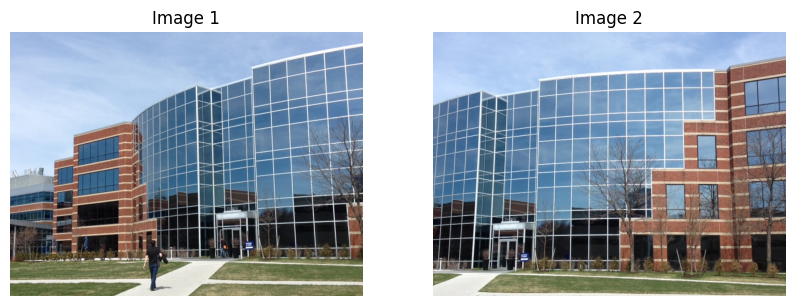

In [3]:
# Define a file path pattern to match image files (image1.png and image2.png)
image_paths = glob.glob('image[12].png')

# Create an empty list to store the loaded images
images = []

# Iterate through the image file paths
for image in image_paths:
    # Read each image using OpenCV and append it to the list
    img = cv2.imread(image)
    images.append(img)

# Call the plt_show function to display the loaded images
plt_show(images)

### Image Stitching with OpenCV

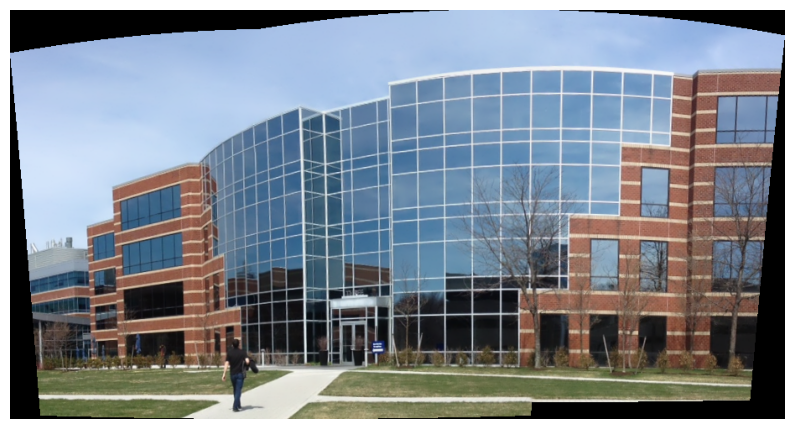

In [4]:
# Create a Stitcher using OpenCV
imageStitcher = cv2.Stitcher_create()

# Stitch the images
error, stitched_img = imageStitcher.stitch(images)

# Check if stitching was successful
if not error:
    # Display the stitched image using plt_show function
    plt_show([stitched_img])

### Highlighting Black Edges in Stitched Image

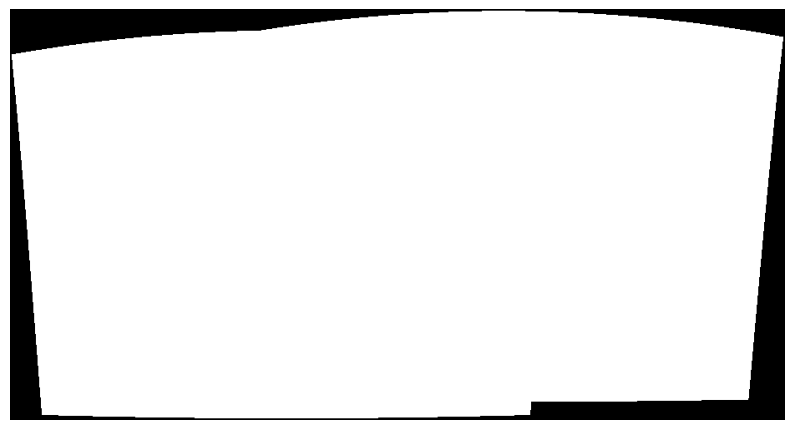

In [5]:
# Add a border to the stitched image using cv2.copyMakeBorder
stitched_img = cv2.copyMakeBorder(stitched_img, 2, 2, 2, 2, cv2.BORDER_CONSTANT, (0, 0, 0))

# Convert the stitched image to grayscale
gray = cv2.cvtColor(stitched_img, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to create a binary image
thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

# Display the thresholded image using plt_show function
plt_show([thresh_img])

### Contour Manipulation

In [6]:
# Find contours in the binary image
contours = cv2.findContours(thresh_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract contours using imutils helper function
contours = imutils.grab_contours(contours)

# Find the contour with the maximum area
areaOI = max(contours, key=cv2.contourArea)

# Create a mask initialized with zeros
mask = np.zeros(thresh_img.shape, dtype="uint8")

# Get the bounding box of the largest contour and draw it on the mask
x, y, w, h = cv2.boundingRect(areaOI)
cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

# Create a copy of the mask
minRectangle = mask.copy()

# Create another copy of the mask
sub = mask.copy()

# Erode the minRectangle until it becomes zero
while cv2.countNonZero(sub) > 0:
    minRectangle = cv2.erode(minRectangle, None)
    sub = cv2.subtract(minRectangle, thresh_img)

# The resulting minRectangle is the desired output

### Contour Visualization

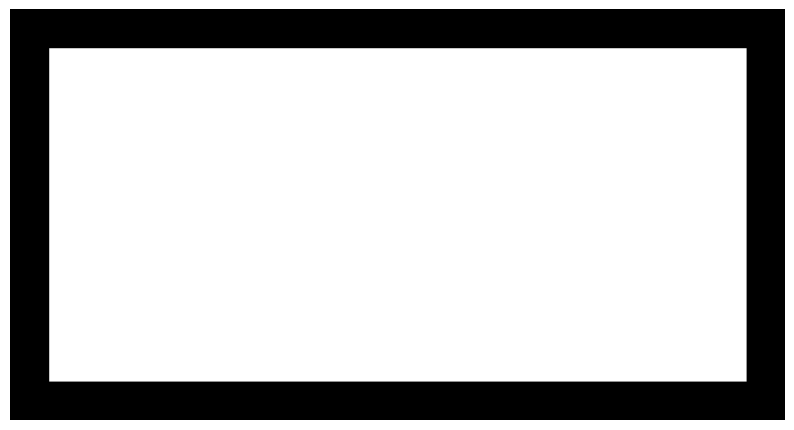

In [7]:
# Find contours in the minRectangle image
contours = cv2.findContours(minRectangle.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract contours using imutils helper function
contours = imutils.grab_contours(contours)

# Find the contour with the maximum area
areaOI = max(contours, key=cv2.contourArea)

# Display the minRectangle image
plt_show([minRectangle])

### Image Cropping Based on the Contour and Displaying it

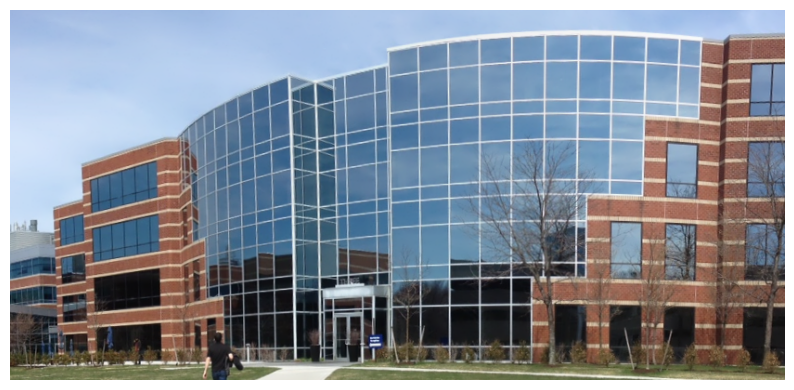

In [8]:
# Extract the bounding rectangle from the contour area
x, y, w, h = cv2.boundingRect(areaOI)

# Crop a region from the stitched_img based on the rectangle dimensions
stitched_img1 = stitched_img[y:y+h,x:x+w]

# Display the cropped region of the stitched_img
plt_show([stitched_img1])

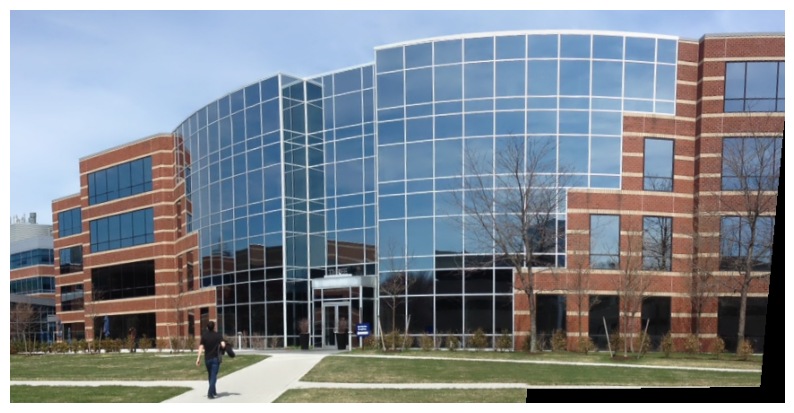

True

In [9]:
# Crop a region from the stitched_img based on the rectangle dimensions
stitched_img2 = stitched_img[y:y+h+40, x:x+w+30]

# Display the cropped region of the stitched_img
plt_show([stitched_img2])

# Save the stitched image to a file
cv2.imwrite("MyOutput1.png", stitched_img2)